## Dataset
 
Url : https://www.kaggle.com/datasets/charuchaudhry/plantvillage-tomato-leaf-dataset/data

In [79]:
import os
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import torch

In [80]:


class ImageFolderDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images organized in subfolders
            transform (callable, optional): Optional transform to be applied on a sample
        """
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        
        self.image_paths = []
        self.labels = []
        
        # Collect all image paths and their corresponding labels
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
                
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(class_dir, img_name))
                    self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label


In [81]:
data_dir = "./data/tomato-disease"
batch_size = 32
seed=42
train_split = 0.7
val_split = 0.15

In [82]:
from collections import Counter

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create dataset
dataset = ImageFolderDataset(data_dir, transform=transform)

# Create dataloaders
data_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0 # use 4 for training
)

classes = dataset.classes

class_counts = Counter(dataset.labels)

# Print counts for each class in a formatted way
print("\nImages per class:")
print("-" * 50)
for class_idx, count in sorted(class_counts.items()):
    class_name = dataset.classes[class_idx]
    if not class_name.startswith('.'):  # Skip .DS_Store
        print(f"{class_name:<50} {count:>5} images")
print("-" * 50)
print(f"Total images: {sum(count for class_name, count in zip(dataset.classes, class_counts.values()) if not class_name.startswith('.'))}")

# Print dataset information
print(f"Total number of images: {len(dataset)}")
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")


Images per class:
--------------------------------------------------
Tomato___Bacterial_spot                             1702 images
Tomato___Early_blight                                800 images
Tomato___Late_blight                                1527 images
Tomato___Leaf_Mold                                   761 images
Tomato___Septoria_leaf_spot                         1417 images
Tomato___Spider_mites Two-spotted_spider_mite       1341 images
Tomato___Target_Spot                                1123 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus              4286 images
Tomato___Tomato_mosaic_virus                         299 images
Tomato___healthy                                    1273 images
--------------------------------------------------
Total images: 14529
Total number of images: 14529
Number of classes: 10
Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-s

In [83]:
# show images
import matplotlib.pyplot as plt

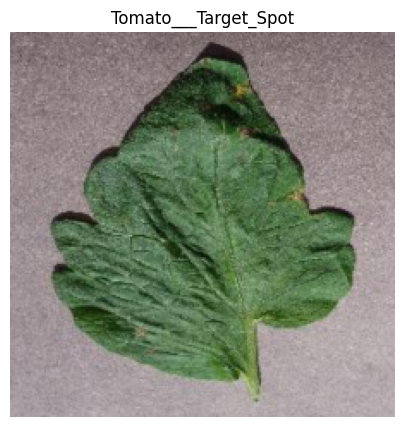

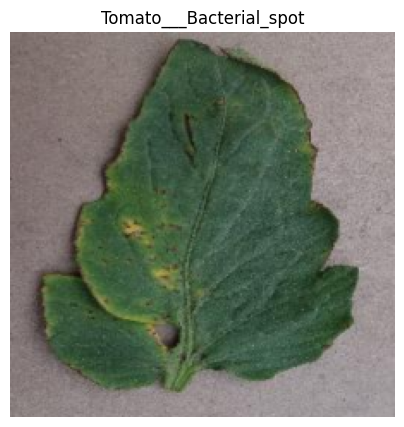

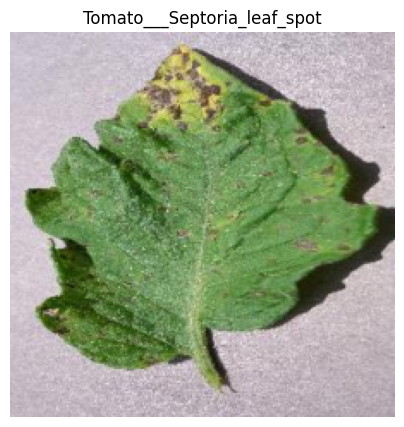

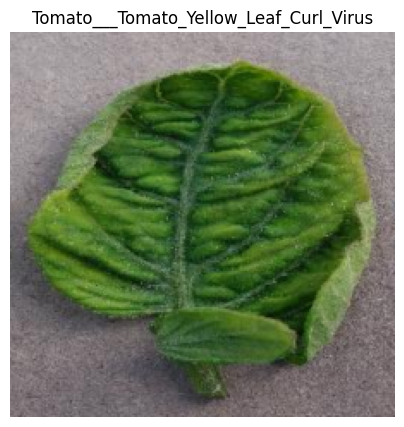

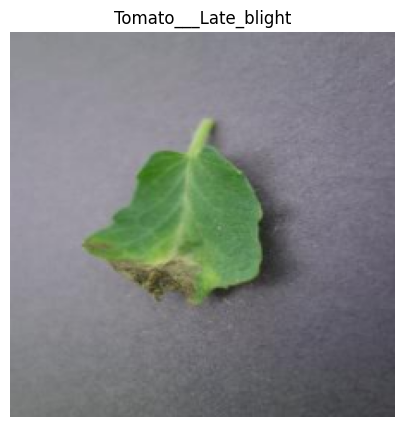

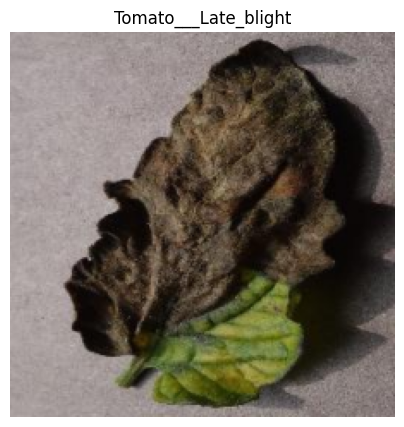

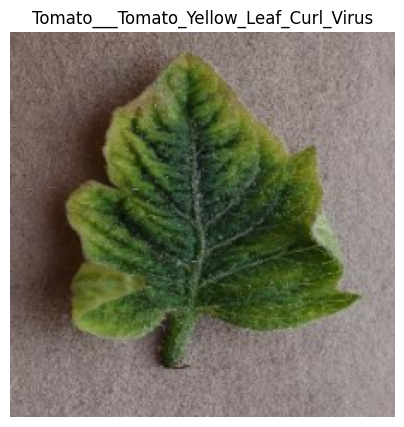

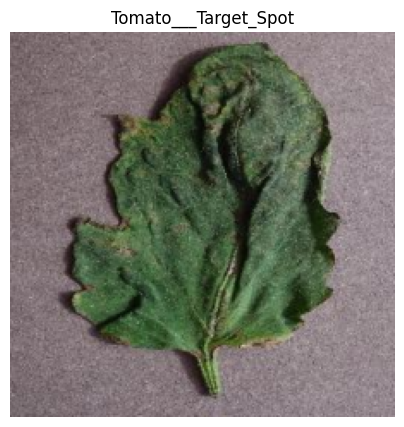

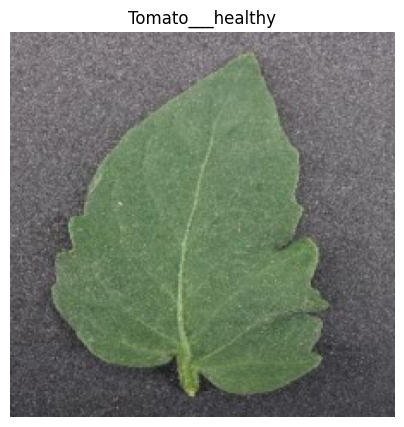

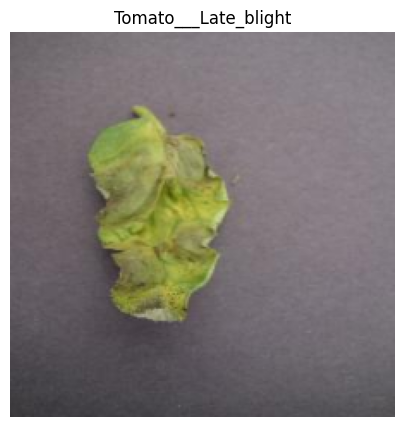

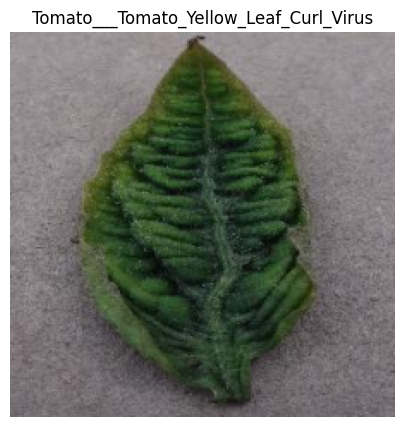

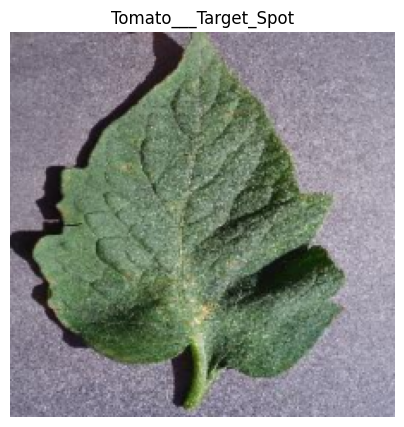

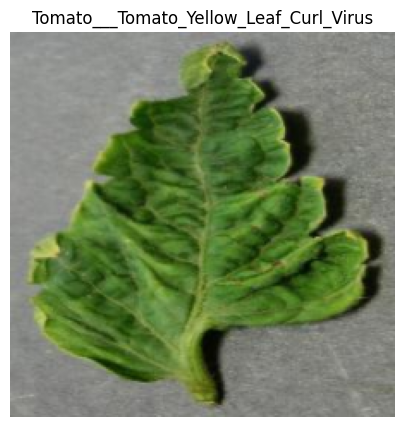

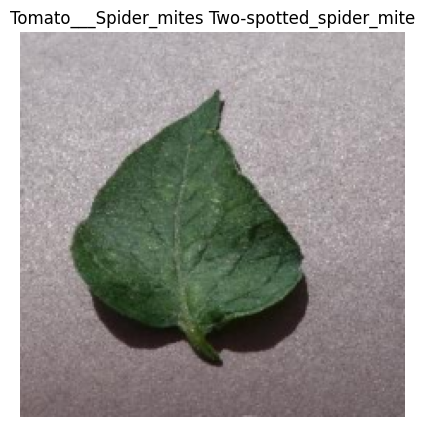

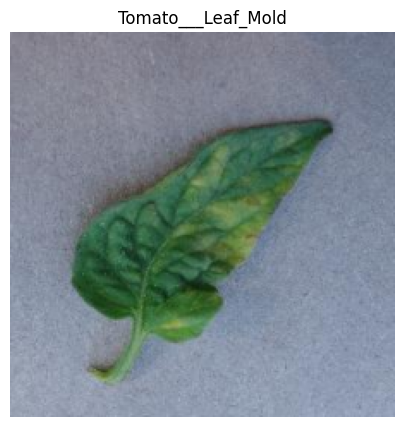

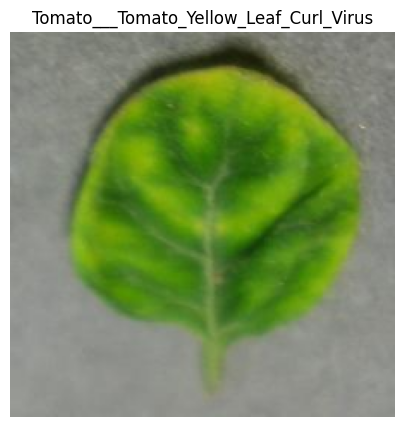

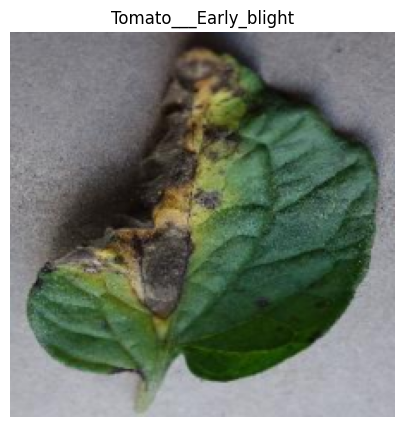

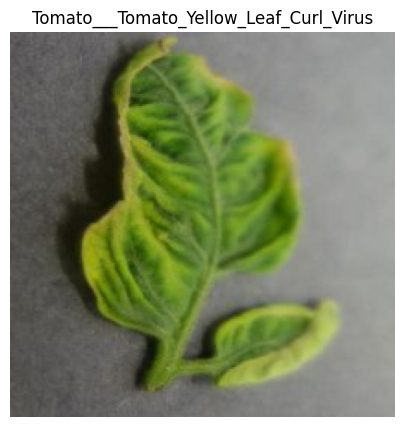

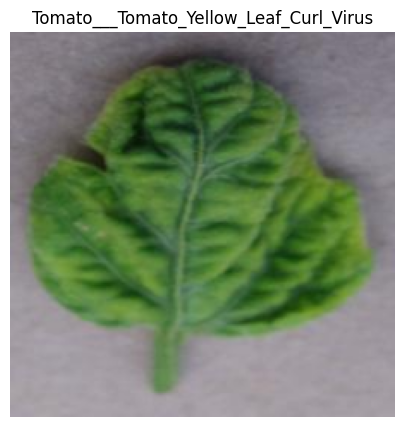

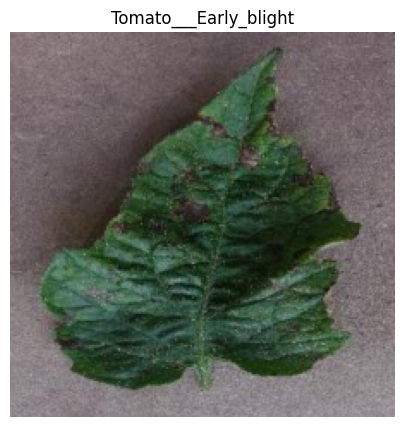

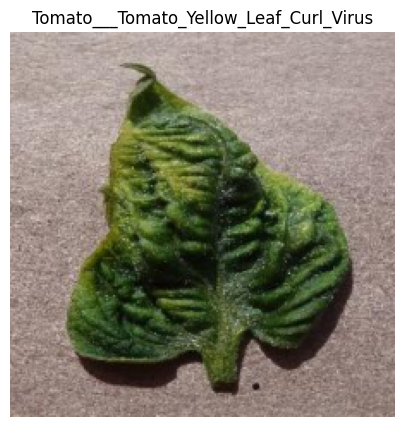

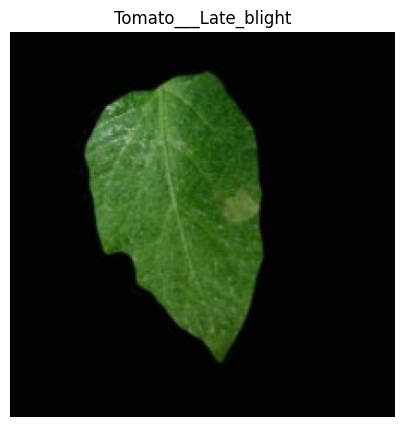

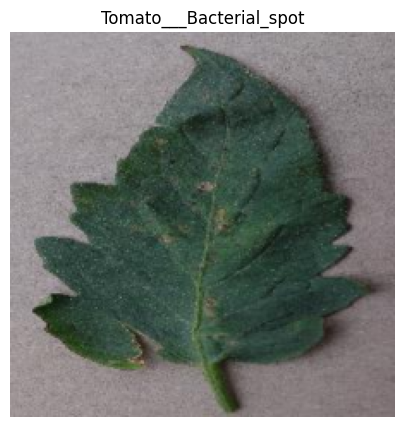

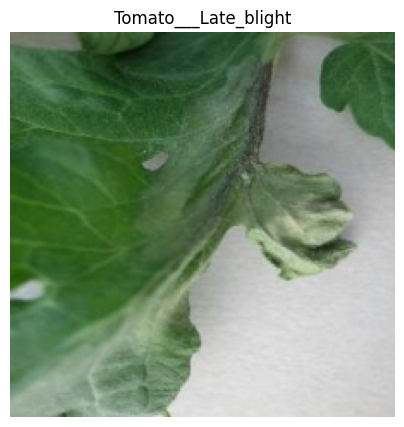

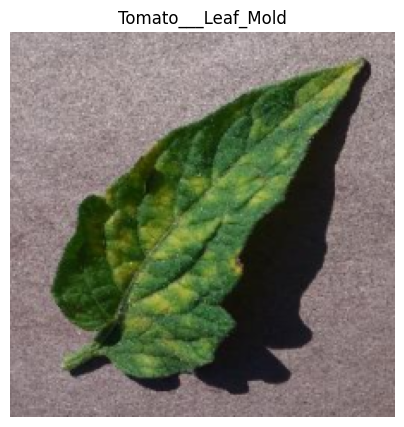

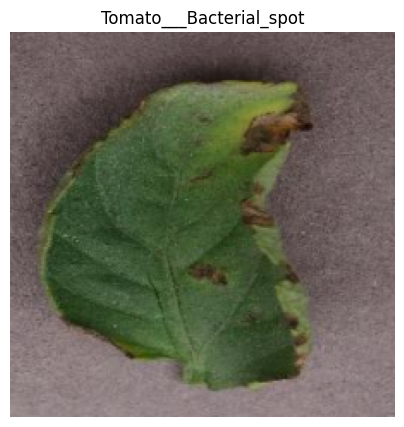

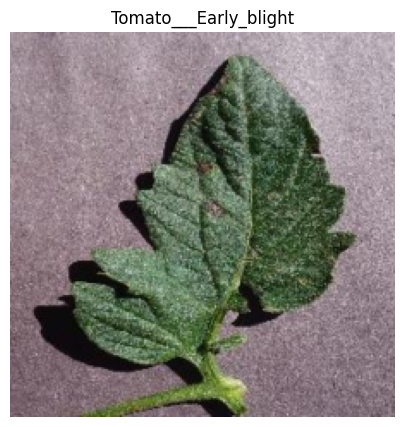

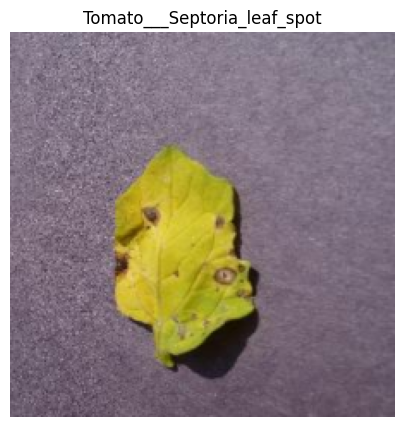

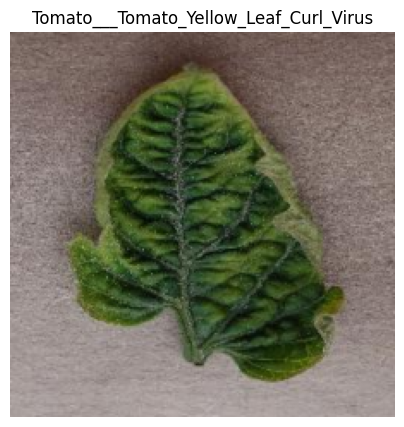

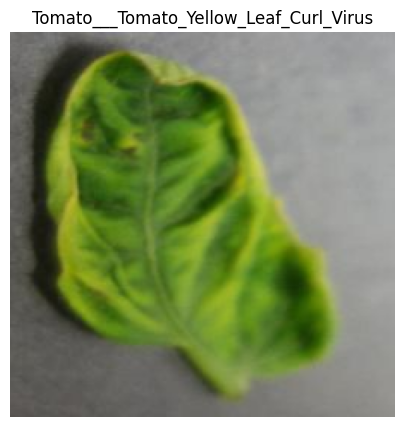

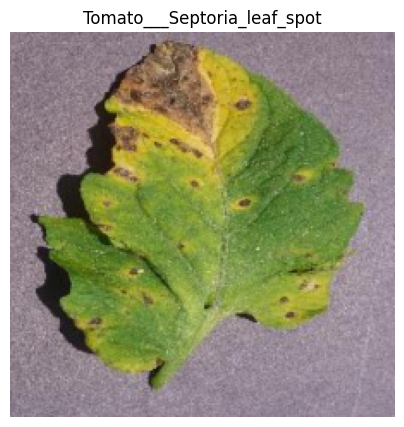

In [84]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Get the first batch from the DataLoader
for images, labels in data_loader:
    batch_size = images.size(0)
    
    for i in range(batch_size):
        plt.figure(figsize=(5, 5))  # Set a larger figure size for each image
        img = images[i].permute(1, 2, 0).numpy()
        
        plt.imshow(img)
        plt.title(classes[labels[i].item()])  # Display the class label as the title
        plt.axis("off")  # Hide the axes
        plt.show()
    
    break  # Only display the first batch
